# Datasets

This part of the notebook is organized by dataset. All questions are answered for each dataset, except for those that are not specific to the data, in which case they are answered under the Dataset 1 section.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PolynomialFeatures
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from scipy.linalg import LinAlgWarning
import warnings
from skopt import BayesSearchCV
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split


## Dataset 1: Diamond Characteristics

### Data Inspection

In [24]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.drop(columns=diamond_df.columns[0],inplace=True)
diamond_df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    330  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    327  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    328  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    337  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    338  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2758  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2759  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2760  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2761  5.83  5.87  3.64

[53940 rows x 10 columns]

In [60]:
diamond_df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3934.801557      5.731157   
std        0.474011      1.432621      2.234491   3989.442321      1.121761   
min        0.200000     43.000000     43.000000    327.000000      0.000000   
25%        0.400000     61.000000     56.000000    952.000000      4.710000   
50%        0.700000     61.800000     57.000000   2403.000000      5.700000   
75%        1.040000     62.500000     59.000000   5327.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [25]:
# separate target
y = diamond_df['price']
X = diamond_df.drop("price", axis=1, inplace=False)
X

carat        cut color clarity  depth  table     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  5.83  5.87  3.64

[53940 rows x 9 columns]

In [26]:
# ordinal encode ordinal categorial features

cat_features = ['cut', 'color', 'clarity']
cut_labels = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_labels = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_labels = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

X_enc = X.drop(cat_features, axis=1, inplace=False)

enc = pd.DataFrame(OrdinalEncoder(categories=[cut_labels, color_labels, clarity_labels]).fit_transform(X[cat_features]), columns=cat_features)
X_enc = X_enc.join(enc, how='right')

# standardize features
X_proc = pd.DataFrame(StandardScaler().fit_transform(X_enc), columns=X_enc.columns)

X_proc

carat     depth     table         x         y         z       cut  \
0     -1.198168 -0.174092 -1.099672 -1.587837 -1.536196 -1.571129  0.981473   
1     -1.240361 -1.360738  1.585529 -1.641325 -1.658774 -1.741175  0.085889   
2     -1.198168 -3.385019  3.375663 -1.498691 -1.457395 -1.741175 -1.705279   
3     -1.071587  0.454133  0.242928 -1.364971 -1.317305 -1.287720  0.085889   
4     -1.029394  1.082358  0.242928 -1.240167 -1.212238 -1.117674 -1.705279   
...         ...       ...       ...       ...       ...       ...       ...   
53935 -0.164427 -0.662711 -0.204605  0.016798  0.022304 -0.054888  0.981473   
53936 -0.164427  0.942753 -1.099672 -0.036690  0.013548  0.100988 -1.705279   
53937 -0.206621  0.733344  1.137995 -0.063434 -0.047741  0.030135 -0.809695   
53938  0.130927 -0.523105  0.242928  0.373383  0.337506  0.285204  0.085889   
53939 -0.101137  0.314528 -1.099672  0.088115  0.118616  0.143499  0.981473   

          color   clarity  
0      0.937163 -1.245215  
1      0.937163 -0.638095  
2      0.937163  0.576145  
3     -1.414272 -0.030975  
4     -2.002131 -1.245215  
...         ...       ...  
53935  1.525021 -0.638095  
53936  1.525021 -0.638095  
53937  1.525021 -0.638095  
53938 -0.826413 -1.245215  
53939  1.525021 -1.245215  

[53940 rows x 9 columns]

**Question 1**: For the diamond dataset, the categorical features 'cut', 'color', and 'clarity' were encoded with the ordinal encoder, since they each have an ordinal structure from worst to best. All the features were then scaled to have zero mean, unit variance.

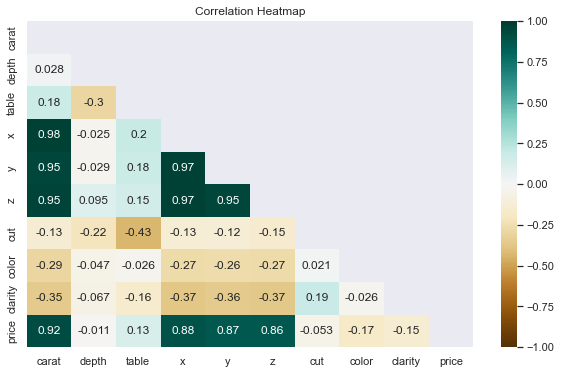

In [212]:
# heatmap of correlation with target variable

diamond_full = X_proc.join(y, how='right')
corr_mat = diamond_full.corr()

plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation Heatmap")
plt.show()

**Question 2**: The heatmap of the Pearson correlation matrix is shown above. The features carat, x, y, and z have the highest absolute correlation with the target variable. This high correlation suggests that these four features may be most informative of price, while the other five features have much weaker correlation with price.

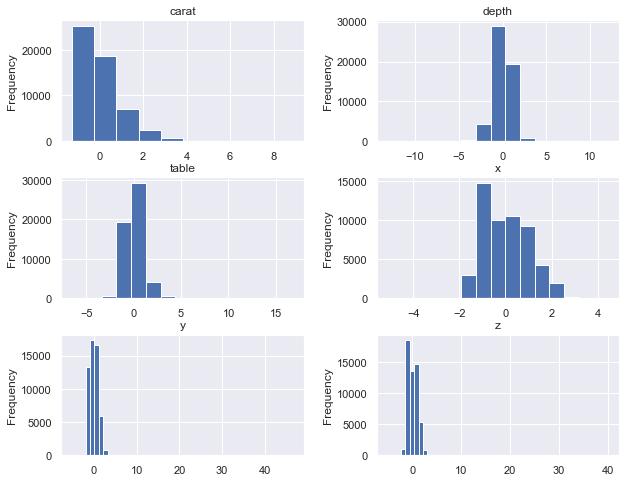

In [213]:
# histograms of normalized numerical features

num_features = [col for col in X_proc.columns if col not in cat_features]

fig = plt.figure(figsize=(10,8))

bins_list = [10,15,15,15,50,50]
for i, col in enumerate(num_features):
    ax = fig.add_subplot(int('32'+str(i+1)))
    X_proc.hist(column=col, bins=bins_list[i], ax=ax)
    ax.set_ylabel('Frequency')

plt.show()

**Question 3**: The histograms of numerical features are plotted above. For a feature with high skewness, a nonlinear transformation, such as a logarithm, can be applied to remove skewness. The logarithm can help compress the tail of the distribution and spread out the other side, so that a long tail does not contribute too many outliers.

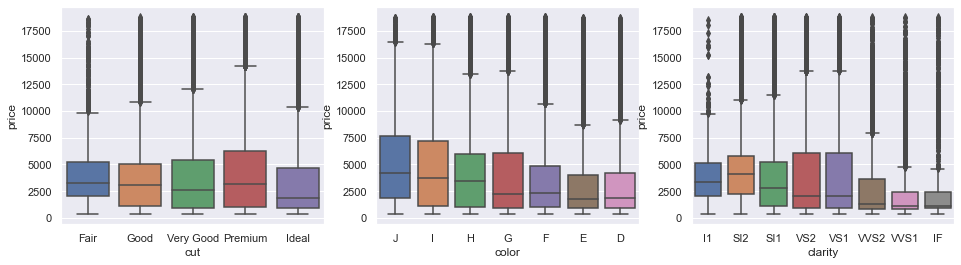

In [337]:
# box plot of categorical features vs. target

fig = plt.figure(figsize=(16,4))
sns.set(style="darkgrid")

orders = [cut_labels, color_labels, clarity_labels]
for i, col in enumerate(cat_features):
    ax = fig.add_subplot(int('13'+str(i+1)))
    ax = sns.boxplot(x=col, y='price', data=diamond_df, order=orders[i])
    
plt.show()

**Question 4**:  The box plots of each categorical feature vs. price are shown above. The price seems to be spread evenly over the different types of cut, with no obvious trend in the median or middle 50% of data. The box plot for cut does show that there may be a trend in the maximum price (excluding outliers) as the cut improves from fair to premium, but the maximum price drops back down for an ideal cut. The price generally decreases as color increases from worst (J) to best (D), with median, upper quartile, and maximum values all following this trend. The box plot for clarity shows a similar trend in the median values, as median price overall decreases as clarity increase from worst (I1) to best (IF). The upper quartail and maximum values, however, suggest that the price is actually highest for the mid-range of clarity at VS2 and VS1, with price decreasing slightly moving toward I1 and decreasing more drastically moving toward IF.

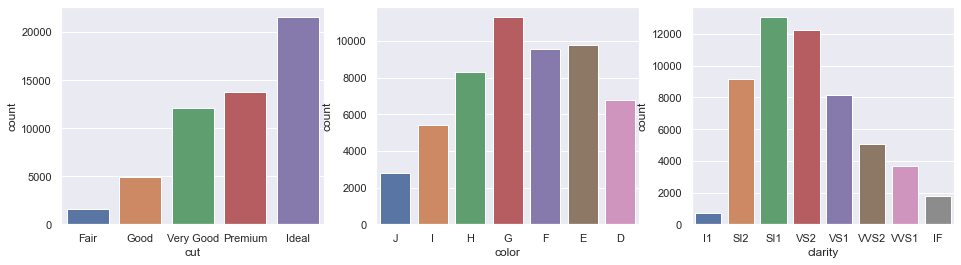

In [178]:
# counts by color, cut, and clarity

fig = plt.figure(figsize=(16,4))

orders = [cut_labels, color_labels, clarity_labels]
for i, col in enumerate(cat_features):
    ax = fig.add_subplot(int('13'+str(i+1)))
    ax = sns.countplot(x=col, data=diamond_df, order=orders[i])
    
plt.show()

**Question 5**: The counts by cut, color, and clarity are plotted above.

### Feature Selection

In [5]:
# mutual information regression

mi = mutual_info_regression(X_proc, y)
mi /= np.max(mi)
mi_features = X_proc.columns[np.argsort(mi)[::-1]]
print("Features in decreasing mutual information with target: {}".format(mi_features.tolist()))
print("Decreasing mutual information: {}".format(np.sort(mi)[::-1]))

Features in decreasing mutual information with target: ['carat', 'y', 'x', 'z', 'clarity', 'color', 'cut', 'table', 'depth']
Decreasing mutual information: [1.         0.86043206 0.85516484 0.8242518  0.13471065 0.08423571
 0.03360512 0.02257036 0.01916729]


In [205]:
# f regression

f_test, _ = f_regression(X_proc, y)
f_test /= np.max(f_test)
f_features = X_proc.columns[np.argsort(f_test)[::-1]]
print("Features in decreasing F score with target: {}".format(f_features.tolist()))
print("Decreasing F score: {}".format(np.sort(f_test)[::-1]))

Features in decreasing F score with target: ['carat', 'x', 'y', 'z', 'color', 'clarity', 'table', 'cut', 'depth']
Decreasing F score: [1.00000000e+00 6.37199723e-01 5.29238203e-01 5.09529712e-01
 5.44118782e-03 3.90725623e-03 2.91437274e-03 5.09073214e-04
 2.01145652e-05]


In [27]:
X_proc = X_proc.drop(columns=['color','clarity','table','cut','depth'])
X_feaures = X_proc.columns
print(X_feaures)

X_proc = X_proc.to_numpy()
print(X_proc.shape)

Index(['carat', 'x', 'y', 'z'], dtype='object')
(53940, 4)


In [28]:
# scale target (NN works better with smaller range)

y = StandardScaler().fit_transform(y.values.reshape(-1,1)).reshape((-1))

**Question 7**: Based on the mutual information and F score of each feature with the target variable, the features 'color', 'clarity', 'table', 'cut', and 'depth' were dropped from the data. These features have significantly lower mutual information and F score with the target, suggesting that there is low statistical dependency between price and each of these features. Dropping these features may lower the performance of regression models because some information is discarded, but training and testing will require less computation.

### Training

In [2]:
def cv_rmse(model, X, y):
    kf = KFold(n_splits=10)
    rmse_train = []
    rmse_test = []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        reg = model.fit(X_train, y_train)
        
        y_pred_train = reg.predict(X_train)
        y_pred_test = reg.predict(X_test)

        rmse_train.append(mean_squared_error(y_train, y_pred_train, squared=False))
        rmse_test.append(mean_squared_error(y_test, y_pred_test, squared=False))

        # print(mean_squared_error(y_train, y_pred_train, squared=False))
        # print(mean_squared_error(y_test, y_pred_test, squared=False))
    
    return np.average(rmse_train), np.average(rmse_test)

#### Linear Regression

The objective function for linear regression (without regularization) is the sum of residuals squared, given by $$J(\theta)=\sum_{i=1}^N(\hat{y}_i-y_i)^2,$$ where $N$ is the number of data points, and $\hat{y}_i=\theta^Tx_i$.

In [33]:
# linear regression

print('Ordinary least squares:')
rmse_train, rmse_test = cv_rmse(LinearRegression(), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

print()

# lasso regression

print('Lasso:')
rmse_train, rmse_test = cv_rmse(Lasso(alpha=0.01), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

print()

# ridge regression

print('Ridge:')
rmse_train, rmse_test = cv_rmse(Ridge(alpha=0.01), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))


Ordinary least squares:
Average training RMSE: 0.3791444488323997
Average validation RMSE: 0.35218698495874473

Lasso:
Average training RMSE: 0.3849980849342374
Average validation RMSE: 0.3692578256125115

Ridge:
Average training RMSE: 0.37914444883509757
Average validation RMSE: 0.3521872477623557


**Question 8**: Lasso regression applies L1 regularization, which encourages the magnitudes of weights to approach zero. Ridge regression penalizes the square magnitude of weights, which also encourages weights to be small. Of the two schemes, lasso regression tends to completely zero out some weights, which produces sparse solutions. Compared to OLS, the learned hypothesis with regularization will tend to have smaller weights and be less sensitive to small changes in input, thus having greater capacity for generalization. The training accuracy may not be as high as OLS, but the model will not overfit as easily.

In [49]:
lasso_params = {'alpha': np.logspace(-9,0,10)}
gs = GridSearchCV(Lasso(), lasso_params, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal lasso regularization: {}'.format(gs.best_estimator_))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal lasso regularization: Lasso(alpha=1e-09)
Best RMSE: 0.3521869867200914


In [51]:
ridge_params = {'alpha': np.logspace(-9,0,10)}
gs = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal ridge regularization: {}'.format(gs.best_estimator_))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal ridge regularization: Ridge(alpha=1e-09)
Best RMSE: 0.3521869849587703


**Question 9**: The optimal penalty parameter should be found from cross validation. Based on the gridsearch with 10-fold cross validation above, lasso and ridge regression both achieve the lowest RMSE of 0.3522 with regularization penalty 1e-9. However, this is slightly higher than the RMSE found from OLS, so the optimal scheme is linear regression without regularization.

**Question 10**: Feature scaling does not play a role in the final estimation for OLS. When features are standardized, the learned parameters will simply be correspondingly scaled versions of the parameters learned from unscaled features. The linear regression model will differ, but the outputs will stay the same.

Feature scaling does however play a role when incorporating regularization. When some features take on much larger values than other features, the parameters learned for the large-valued features will be small, and the parameters learned for small-valued features will be large, to have the same effect on the output. Regularization constrains the magnitude of learned parameters equally, which disproportionately penalizes features with small values, because removing the small-valued features with large parameters minimizes regularization loss more than removing the large-valued features with small parameters.

**Question 11**: The p-value returned by some linear regression packages describes the probability that the data has occurred under the null hypothesis that there is no relation between the feature and the target, or by random chance. A lower p-value for a feature implies that the feature has greater statistical correlation with the target value, and provides stronger evidence for rejecting the null hypothesis.

#### Polynomial Regression

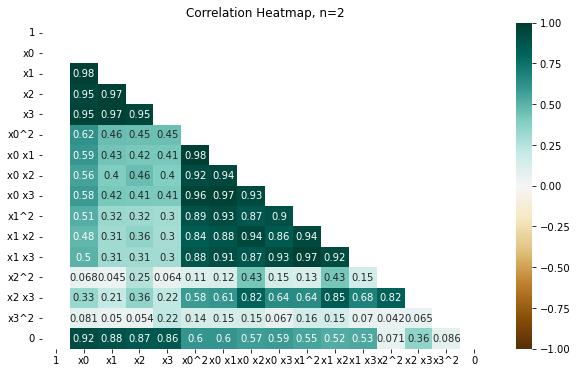

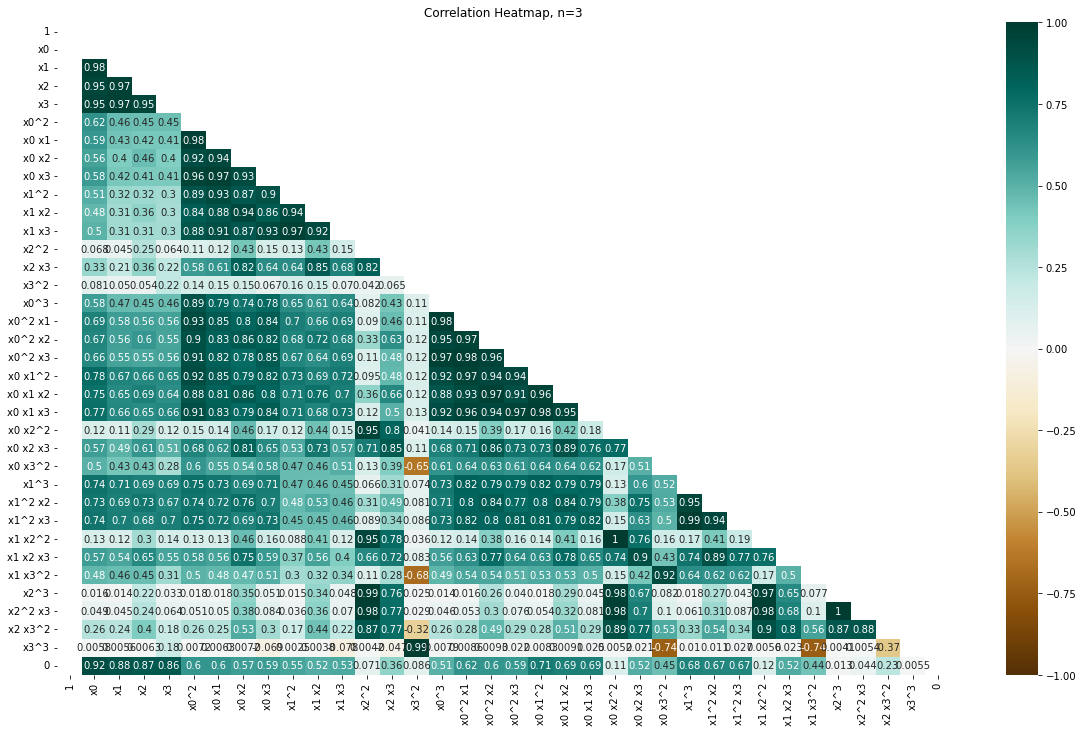

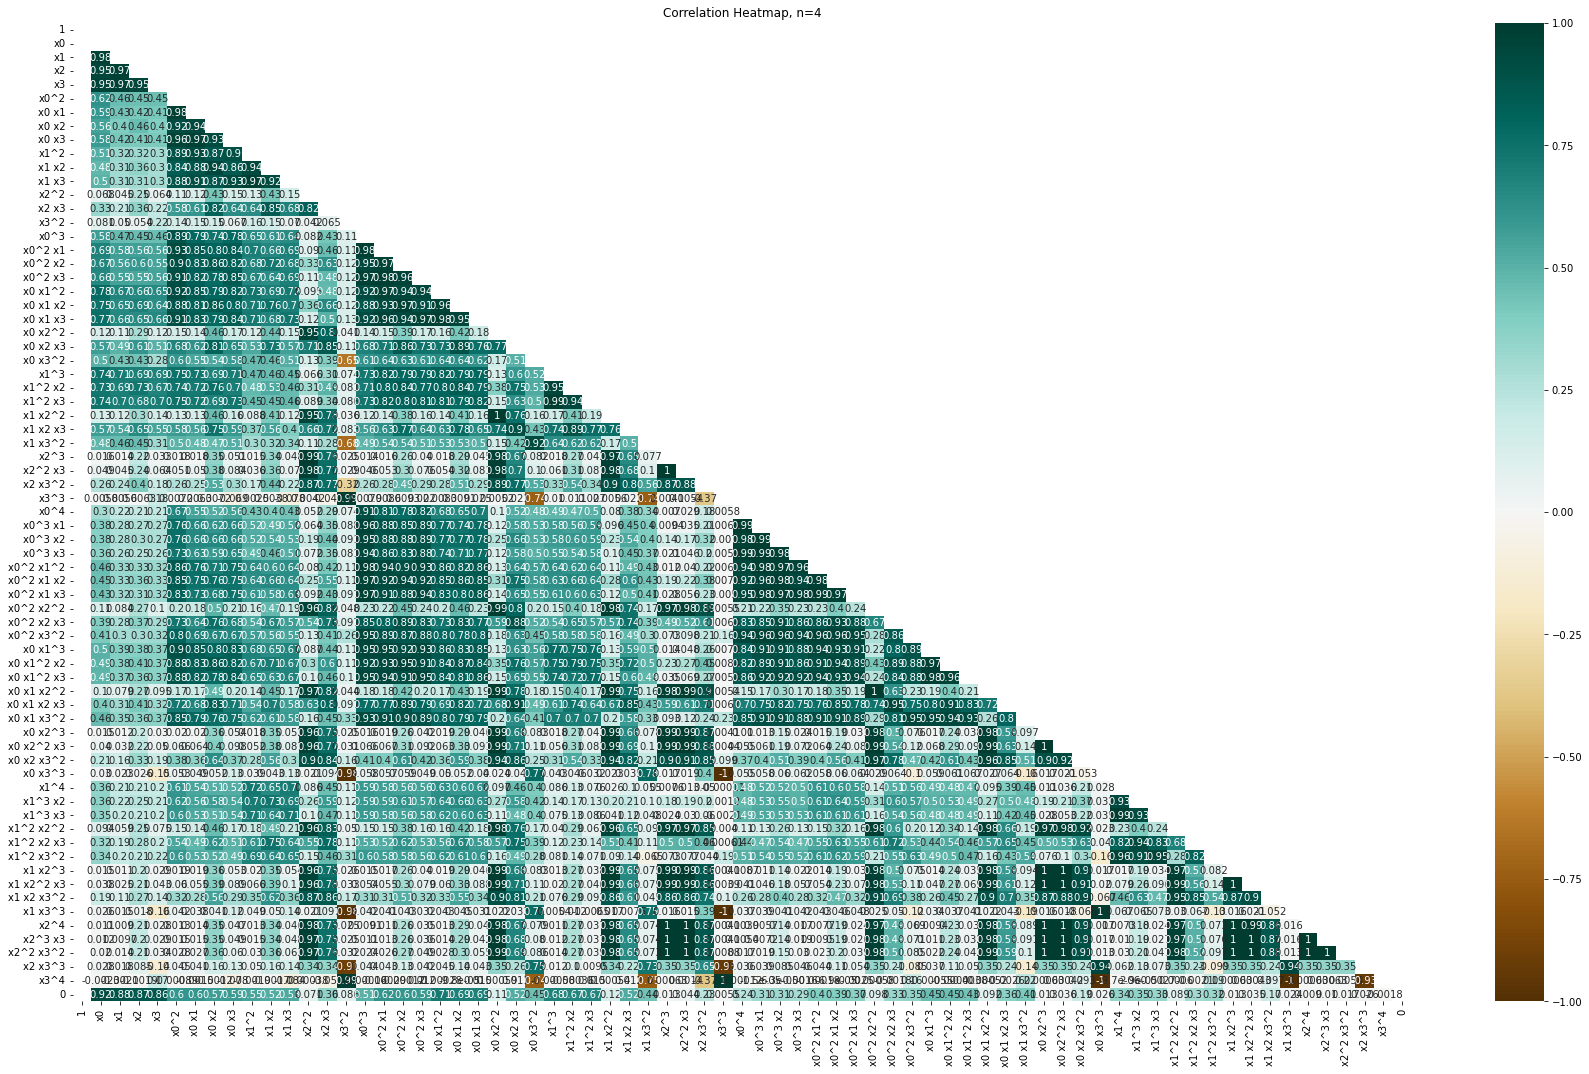

In [56]:
# polynomial features correlation map

for n in np.arange(2,5):

    poly = PolynomialFeatures(n)
    X_poly = poly.fit_transform(X_proc)

    # heatmap of polynomial feature correlation with target variable

    X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())
    diamond_full = X_poly_df.join(pd.DataFrame(y), how='right')
    corr_mat = diamond_full.corr()

    plt.figure(figsize=(10*(n-1),6*(n-1)))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title("Correlation Heatmap, n={}".format(n))
    plt.show()
    

**Question 12**: The most salient features appear to be the four original features: carat (labelled x0 above), x (x1), y (x2), and z (x3), as these have the highest Pearson correlation coefficients with the target variable as shown in the heatmaps. The features x0x1^2, x0x1x2, x0x1x3, x1^3, x1^2x2, x1^2x3 also have relatively high correlation coefficients (around 0.7). The remaining polynomial features have lower correlation coefficients, around 0.6 or below.

x (x1) appears in all these salient polynomial features, suggesting that the interaction terms of x with the other three features is important in predicting price. Similarly, the interaction terms of carat with x, y, and z seem to be important in the prediction task. Interestingly, all the salient features are only of the first and third degrees, suggesting that diamond price might have a combination of a linear and a cubic relation to the carat, x, y, and z.

In [76]:
# polynomial regression

with ignore_warnings(category=(ConvergenceWarning, LinAlgWarning)):
    
    for n in np.arange(2,5):

        print("Degree: {}".format(n))

        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_proc)

        # OLS

        print('Ordinary least squares:')
        rmse_train, rmse_test = cv_rmse(LinearRegression(), X_poly, y)

        print('Average training RMSE: {}'.format(rmse_train))
        print('Average validation RMSE: {}'.format(rmse_test))

        # lasso regression

        lasso_params = {'alpha': np.logspace(-9,0,10)}
        gs = GridSearchCV(Lasso(), lasso_params, cv=10, scoring='neg_root_mean_squared_error')
        gs.fit(X_poly, y)

        print('Optimal lasso regularization: {}'.format(gs.best_estimator_))
        print('Best RMSE: {}'.format(-gs.best_score_))

        # ridge regression

        ridge_params = {'alpha': np.logspace(-9,0,10)}
        gs = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_root_mean_squared_error')
        gs.fit(X_poly, y)

        print('Optimal ridge regularization: {}'.format(gs.best_estimator_))
        print('Best RMSE: {}'.format(-gs.best_score_))

        print()


Degree: 2
Ordinary least squares:
Average training RMSE: 0.35309284845258215
Average validation RMSE: 0.4892206049436324
Optimal lasso regularization: Lasso(alpha=0.01)
Best RMSE: 0.3502525255672773
Optimal ridge regularization: Ridge()
Best RMSE: 0.4746372231541668

Degree: 3
Ordinary least squares:
Average training RMSE: 0.3438853984489838
Average validation RMSE: 5.081186943474652
Optimal lasso regularization: Lasso(alpha=0.01)
Best RMSE: 0.6600337666813251
Optimal ridge regularization: Ridge(alpha=1e-09)
Best RMSE: 5.081187104746045

Degree: 4
Ordinary least squares:
Average training RMSE: 0.3396453941341749
Average validation RMSE: 472.08181798112844
Optimal lasso regularization: Lasso()
Best RMSE: 0.719325816402008
Optimal ridge regularization: Ridge()
Best RMSE: 241.19448063854324



**Question 13**: A high-order polynomial may introduce redudant features in the training set, which will cause the model to overfit and achieve low training error but very high validation and testing error. The above test show that for OLS, $n=1$ has the highest training RMSE of 0.3791 while $n=4$ has the lowest training RMSE of 0.3396. Validation accuracies show the opposite trend, increasing from 0.3522 for $n=1$ to 472.1 for $n=4$, confirming that the polynomial regression (without regularization) is causing overfitting.

The optimal degree of the polynomial should be chosen from the validation RMSE. The best degree was found to be 2, using lasso regression with alpha=0.01, which achieved a validation RMSE of 0.3503.

**Question 14**: It makes sense to craft new features for the diamonds dataset because the four most important features extracted (carat, x, y, z) represent physical measurements of the form of the diamond, and an interaction term may better explain the three-dimensional form better than measurements in a single direction. For instance, a new feature x\*y\*z, which measures the volume of a diamond, could be more relevant in predicting price, as diamonds with different dimensions can have the same volume and similar price, but their similarity is not evident without crafting the new feature.

The results above show that crafting polynomial features does improve accuracy with proper regularization. Introducing quadratic terms allowed RMSE to decrease from 0.3522 with linear terms only to 0.3503.

#### Neural Network

In [71]:
# neural network

reg = MLPRegressor(hidden_layer_sizes=(100,), alpha=1e-4, max_iter=200)
rmse_train, rmse_test = cv_rmse(reg, X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

Average training RMSE: 0.3363354028722305
Average validation RMSE: 0.3790192357839214


**Question 15**: An MLP can do better than linear regression because it can capture nonlinear relationships through its nonlinear activation functions. The model has greater capacity to fit to the data, whereas linear regression restricts the model to linear relationships only.

In [74]:
# tune network size and weight decay

parameters = {'hidden_layer_sizes': [(20,), (50,), (100,), (20,20), (50,50), (100,100), (20,20,20), (50,50,50), (20,50,100)], 'alpha': np.logspace(-5,-1,5)}
gs = GridSearchCV(MLPRegressor(max_iter=200), parameters, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal MLP: {}'.format(gs.best_estimator_))
print('Weight decay: {}'.format(gs.best_estimator_.get_params()['alpha']))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal MLP: MLPRegressor(hidden_layer_sizes=(20,))
Weight decay: 0.0001
Best RMSE: 0.34449686255096157


**Question 16**: The optimal MLP is one with one layer with 100 units and alpha=0.0001. It achieves an RMSE of 0.3445.

**Question 17**: The activation function used for the output should be one that does not saturate, such as sigmoid and tanh, because that imposes a limit to the maximum output value, which is unrealistic for this regression task. Instead, an activation function like relu, or no activation function, can be used for the output, because it avoids creating an artificial cap on the price of diamonds and allows the model to predict high output values.

**Question 18**: A very deep network risks overfitting, because it introduces more parameters and more nonlinearity which increases the capacity of the model to fit to the training data. This may not generalize well to test data. Another risk of deep neural networks is that backpropagated gradients may be inaccurate because each step of backpropagation accumulates some noise. This could make the gradient descent steps move in the wrong direction instead of toward the optimal solution.

#### Random Forest

In [93]:
# random forest

rmse_train, rmse_test = cv_rmse(RandomForestRegressor(), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

Average training RMSE: 0.14531936282271712
Average validation RMSE: 0.37954842006310596


In [101]:
# tune hyperparameters

parameters = {'n_estimators': [25,50,75,100,150,200], 'max_features': [1,2,3,4], 'max_depth': np.linspace(1,10,10,dtype=int)}

gs = GridSearchCV(RandomForestRegressor(), parameters, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal random forest: {}'.format(gs.best_estimator_))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal random forest: RandomForestRegressor(max_depth=10, max_features=1, n_estimators=150)
Best RMSE: 0.3599611520714049


**Question 19**: The hyperparameters have been tuned above, and the optimal random forest model has max_features=1, n_estimators=150, and max_depth=10.

Increasing max_features can improve the performance of the model, because the model can consider a higher number of possible splits at each nodes and may find a more optimal split than with a lower max_features. However, a high max_features also decreases the diversity of each tree in the random forest, which can reduce the ensembling power of the model. n_estimators acts as regularization and a high number of trees improves performance, because the model averages over more individual decision trees. max_depth can also have a regularization effect, because a low max_depth can cause underfitting due to not finding enough splits to fully capture the distribution of the data, while a high max_depth can cause overfitting due to too many splits that capture small nuances and and noise in the data.

**Question 20**: Random forest performs well because it is an ensemble model. It fits multiple different decision trees to the data then takes the average of all of them, which can result in a more accurate and stable prediction.

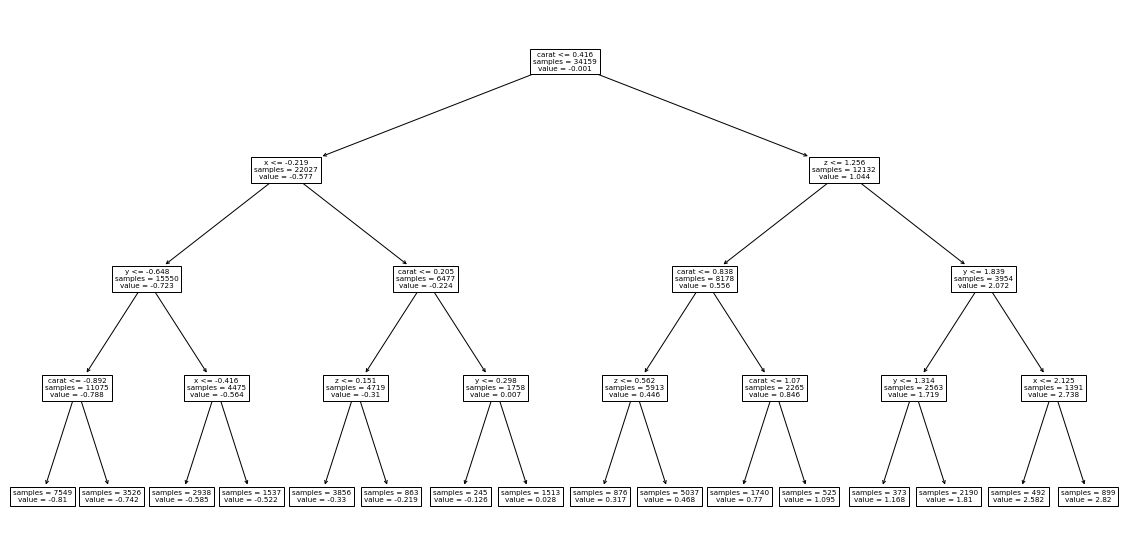

In [115]:
# rf with max_depth=4

reg = RandomForestRegressor(max_depth=4, max_features=1).fit(X_proc, y)

plt.figure(figsize=(20,10))
plot_tree(reg.estimators_[0], feature_names=X_feaures, impurity=False)
plt.show()

**Question 21**: A tree with max_depth of 4 is shown above. The feature selected for branching at the root node is carat, which was also the feature with the highest mutual information score and F score. The feature selected at the root node is likely the feature that is most discriminating for predicting the target from the full training dataset, as splitting based on this feature first leads to the greatest gain.

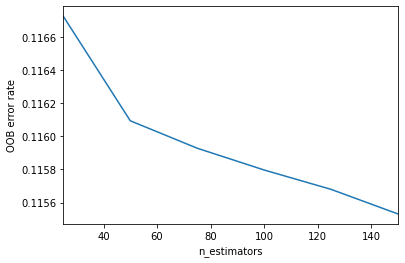

In [29]:
# out of bag error

oob_error_list = []
min_estimators, max_estimators = 25, 150
n_estimators_list = np.linspace(min_estimators, max_estimators, 6, dtype=int)

reg =  RandomForestRegressor(warm_start=True, oob_score=True, max_depth=10, max_features=1, n_estimators=150)

for i in n_estimators_list:
    reg.set_params(n_estimators=i)
    reg.fit(X_proc, y)

    oob_error = 1 - reg.oob_score_
    oob_error_list.append(oob_error)

plt.plot(n_estimators_list, oob_error_list)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

**Question 26**: The OOB error is shown above.

#### LightGBM

In [223]:
# bayesian optimization of LightGBM

warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

parameters = {'n_estimators': [25,50,75,100,150,200],
              'num_leaves': np.linspace(20,1000,5,dtype=int), 
              'max_depth': np.linspace(3,20,17,dtype=int),
              'min_child_samples': np.linspace(100,10000,10,dtype=int), 
              'min_split_gain': np.linspace(0.0,0.9,19),
             }

opt = BayesSearchCV(lgb.LGBMRegressor(), parameters, cv=10, scoring='neg_root_mean_squared_error')
opt.fit(X_proc, y)

print('Optimal LGBM: {}'.format(opt.best_estimator_))
print('Best RMSE: {}'.format(-opt.best_score_))

Optimal LGBM: LGBMRegressor(max_depth=18, min_child_samples=1200, n_estimators=150,
              num_leaves=265)
Best RMSE: 0.35227437668170236


**Question 22**: The LGBM parameters, and their search spaces, chosen for hyperparameter tuning are given above.

**Question 23**: Hyperparameters for LGBM were tuned using Bayesian optimization above. The optimal model found has n_estimators=150, max_depth=18, min_child_samples=1200, min_split_gain=0.0, and num_leaves=265. This model achieved an RMSE of 0.3523.

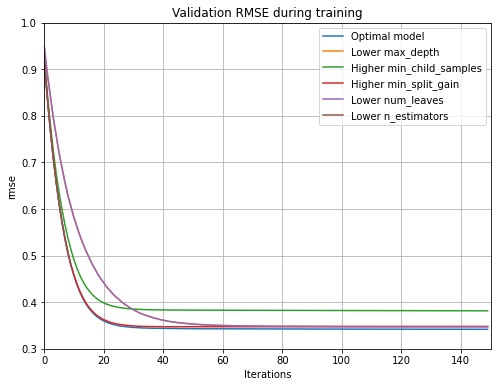

In [300]:
# plot validation RMSE to compare models

X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.1)

reg1 = lgb.LGBMRegressor(n_estimators=150, max_depth=18, min_child_samples=1200, min_split_gain=0.0, num_leaves=265)
reg2 = lgb.LGBMRegressor(n_estimators=10, max_depth=18, min_child_samples=1200, min_split_gain=0.0, num_leaves=265)
reg3 = lgb.LGBMRegressor(n_estimators=150, max_depth=1, min_child_samples=1200, min_split_gain=0.0, num_leaves=265)
reg4 = lgb.LGBMRegressor(n_estimators=150, max_depth=18, min_child_samples=5000, min_split_gain=0.0, num_leaves=265)
reg5 = lgb.LGBMRegressor(n_estimators=150, max_depth=18, min_child_samples=1200, min_split_gain=20.0, num_leaves=265)
reg6 = lgb.LGBMRegressor(n_estimators=150, max_depth=18, min_child_samples=1200, min_split_gain=0.0, num_leaves=20)

eval_result = {}

reg1.fit(X_train, y_train, eval_set=[(X_test, y_test),], eval_metric="rmse", eval_names = ["Optimal model"], callbacks=[lgb.record_evaluation(eval_result)])
reg2.fit(X_train, y_train, eval_set=[(X_test, y_test),], eval_metric="rmse", eval_names = ["Lower n_estimators"], callbacks=[lgb.record_evaluation(eval_result)])
reg3.fit(X_train, y_train, eval_set=[(X_test, y_test),], eval_metric="rmse", eval_names = ["Lower max_depth"], callbacks=[lgb.record_evaluation(eval_result)])
reg4.fit(X_train, y_train, eval_set=[(X_test, y_test),], eval_metric="rmse", eval_names = ["Higher min_child_samples"], callbacks=[lgb.record_evaluation(eval_result)])
reg5.fit(X_train, y_train, eval_set=[(X_test, y_test),], eval_metric="rmse", eval_names = ["Higher min_split_gain"], callbacks=[lgb.record_evaluation(eval_result)])
reg6.fit(X_train, y_train, eval_set=[(X_test, y_test),], eval_metric="rmse", eval_names = ["Lower num_leaves"], callbacks=[lgb.record_evaluation(eval_result)])

ax = lgb.plot_metric(reg1, metric='rmse', figsize=(8,6))
lgb.plot_metric(reg3, metric='rmse', ax=ax)
lgb.plot_metric(reg4, metric='rmse', ax=ax)
lgb.plot_metric(reg5, metric='rmse', ax=ax)
lgb.plot_metric(reg6, metric='rmse', ax=ax)
lgb.plot_metric(reg2, metric='rmse', ax=ax, title='Validation RMSE during training', xlim=(0,150), ylim=(0.3,1.0))
plt.show()

**Question 24**: n_iterators allows the model to build more trees that are aggregated over, so a higher number of n_iterators acts as regularization. num_leaves is the main hyperparameter that controls the complexity of the tree. With a higher number of leaves, a tree is allowed to generate more splits to fit to the distribution of the data. However, a num_leaves that is too high risks overfitting. max_depth can be used along with num_leaves to avoid overfitting by explicitly limiting the depth of the tree. min_child_samples can also help with overfitting, as a large value can avoid creating a very deep tree and prevent overly-specific tree nodes, though too small of a value can cause underfitting and reduce performance. min_split_gain can also act as regularization, as a value of 0.0 will allow splits that produce any amount of gain, whereas increasing the value requires a larger improvement to split a node.

The plot above of validation RMSE shows that the optimal model performs the best, and changing any of the hyperparameter values decreases performances.

#### CatBoost

In [222]:
# bayesian optimization of CatBoost

parameters = {'n_estimators': [25,50,75,100,150,200],
              'num_leaves': np.linspace(20,1000,5,dtype=int),
              'max_depth': np.linspace(3,20,17,dtype=int),
              'min_child_samples': np.linspace(100,10000,10,dtype=int),
             }

opt = BayesSearchCV(CatBoostRegressor(grow_policy='Lossguide', verbose=False), parameters, cv=10, scoring='neg_root_mean_squared_error')
opt.fit(X_proc, y)

print('Optimal CatBoost: {}'.format(opt.best_estimator_.get_params()))
print('Best RMSE: {}'.format(-opt.best_score_))

Optimal CatBoost: {'loss_function': 'RMSE', 'verbose': False, 'max_depth': 8, 'n_estimators': 200, 'grow_policy': 'Lossguide', 'min_child_samples': 3400, 'num_leaves': 510}
Best RMSE: 0.3601062527465239


**Question 22**: The CatBoost parameters, and their search spaces, chosen for hyperparameter tuning are given above.

**Question 23**: Hyperparameters for CatBoost were tuned using Bayesian optimization above. The optimal model found has n_estimators=200, max_depth=8, min_child_samples=3400, and num_leaves=510. This model achieved an RMSE of 0.3601.

In [309]:
# plot training and validation RMSE of optimal model

X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.1)

reg = CatBoostRegressor(verbose=False, eval_metric='RMSE', max_depth=8, n_estimators=200, grow_policy='Lossguide', min_child_samples=3400, num_leaves=510)
reg.fit(X_train, y_train, eval_set=[(X_test, y_test),], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [311]:
# plot training and validation RMSE of suboptimal model

X_train, X_test, y_train, y_test = train_test_split(X_proc, y, test_size=0.1)

reg = CatBoostRegressor(verbose=False, eval_metric='RMSE', max_depth=2, n_estimators=20, grow_policy='Lossguide', min_child_samples=100, num_leaves=10)
reg.fit(X_train, y_train, eval_set=[(X_test, y_test),], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

**Question 24**: n_estimators, max_depth, min_child_samples, and num_leaves were chosen for hyperparameter tuning for the same reasons as for LGBM. The plots above show that the optimal hyperparameters achieve lower validation RMSE than when the values have been modified.

## Dataset 2: Gas Turbine CO and NOx Emission Data Set

### Data Inspection

In [3]:
gas_df = pd.DataFrame()

for i in [1,2,3,4,5]:
    df = pd.read_csv('gt_201{}.csv'.format(i))
    df['year'] = i # encode years as 1,2,3,4,5
    gas_df = pd.concat((gas_df, df))

gas_df.drop(columns='NOX', inplace=True) # choose target to be CO
gas_df

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

            CO  year  
0      0.32663     1  
1      0.44784     1  
2      0.45144     1  
3      0.23107     1  
4      0.26747     1  
...        ...   ...  
7379  10.99300     5  
7380  11.14400     5  
7381  11.41400     5  
7382   3.31340     5  
7383  11.98100     5  

[36733 rows x 11 columns]

In [317]:
gas_df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           TEY           CDP            CO  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517    133.506404     12.060525      2.372468   
std       17.536373      6.842360     15.618634      1.088795      2.262672   
min     1000.800000    511.040000    100.020000      9.851800      0.000388   
25%     1071.800000    544.720000    124.450000     11.435000      1.182400   
50%     1085.900000    549.880000    133.730000     11.965000      1.713500   
75%     1097.000000    550.040000    144.080000     12.855000      2.842900   
max     1100.900000    550.610000    179.500000     15.159000     44.103000   

               year  
count  36733.000000  
mean       2.985735  
std        1.418965  
min        1.000000  
25%        2.000000  
50%        3.000000  
75%        4.000000  
max        5.000000

In [4]:
# separate target
y = gas_df['CO']
X = gas_df.drop("CO", axis=1, inplace=False)
X

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1     4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2     3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3     3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4     3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

      year  
0        1  
1        1  
2        1  
3        1  
4        1  
...    ...  
7379     5  
7380     5  
7381     5  
7382     5  
7383     5  

[36733 rows x 10 columns]

In [5]:
# standardize features

X_proc = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
X_proc

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
0     -1.762362  0.871052  0.401627 -0.451875 -0.377702  0.272119  0.536589   
1     -1.801920  0.809164  0.440351 -0.458207 -0.384376  0.266417  0.568742   
2     -1.854113  0.824636  0.483432 -0.442831 -0.375081  0.289227  0.589203   
3     -1.875718  0.809164  0.523263 -0.445415 -0.393909  0.289227  0.586280   
4     -1.874644  0.731804  0.505837 -0.448904 -0.392479  0.255012  0.561434   
...         ...       ...       ...       ...       ...       ...       ...   
36728 -1.891401  2.387315  1.060287 -0.981255 -1.543602 -2.533516 -0.667691   
36729 -1.818812  2.402787  1.118097 -0.947401 -1.560524 -2.499301 -0.566847   
36730 -1.642292  2.387315  1.199903 -0.791702 -1.598418 -2.476491 -0.391466   
36731 -1.588354  2.418260  1.129438  0.074403 -0.476847 -0.258214  0.577511   
36732 -1.567474  2.433732  1.153434 -0.065016 -0.724469 -0.771440  0.302748   

            TEY       CDP      year  
0      0.074502 -0.149273 -1.399443  
1      0.074502 -0.154783 -1.399443  
2      0.102033 -0.017015 -1.399443  
3      0.097551 -0.064774 -1.399443  
4      0.074502 -0.138251 -1.399443  
...         ...       ...       ...  
36728 -1.563948 -1.515021  1.419550  
36729 -1.582516 -1.576558  1.419550  
36730 -1.645262 -1.468179  1.419550  
36731 -0.134226 -0.265917  1.419550  
36732 -0.518388 -0.549721  1.419550  

[36733 rows x 10 columns]

**Question 1**: For the gas dataset, the year feature was encoded as integers 1 through 5 corresponding to years 2011 to 2015, as the years has an ordinal structure. All the features were then scaled to have zero mean, unit variance.

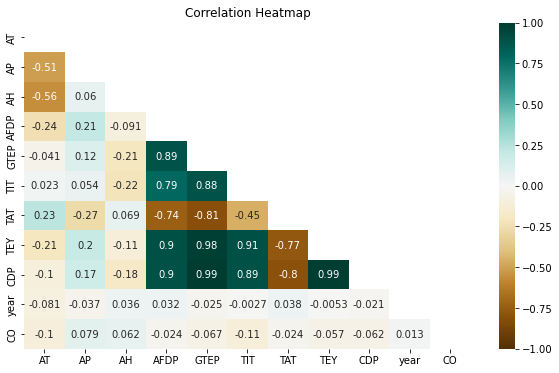

In [320]:
# heatmap of correlation with target variable

gas_full = X_proc.join(y, how='right')
corr_mat = gas_full.corr()

plt.figure(figsize=(10,6))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title("Correlation Heatmap")
plt.show()

**Question 2**: The heatmap of the Pearson correlation matrix is shown above. No features seems to have a high correlation coefficient with the target CO, as the absolute correlation values are all small, around 0.1 or lower. This indicates that these raw features are not strongly correlated with CO emissions.

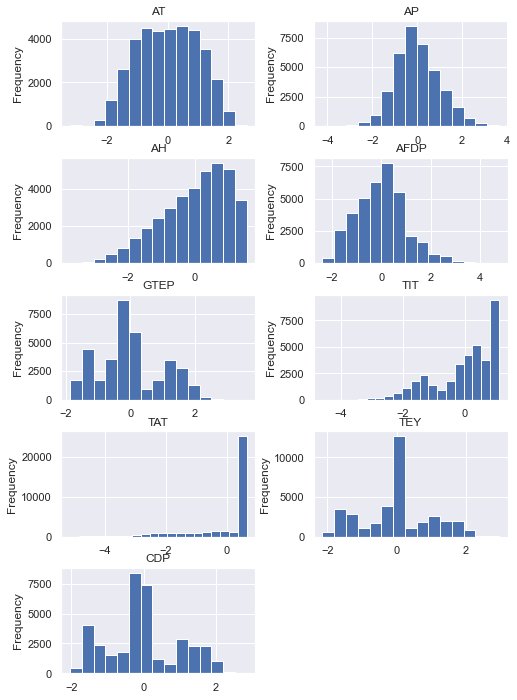

In [339]:
# histograms of normalized numerical features

num_features = [col for col in X_proc.columns if col!='year']

fig = plt.figure(figsize=(8,12))

bins_list = [15,15,15,15,15,20,20,15,15]
for i, col in enumerate(num_features):
    ax = fig.add_subplot(5,2,i+1)
    X_proc.hist(column=col, bins=bins_list[i], ax=ax)
    ax.set_ylabel('Frequency')

plt.show()

**Question 3**: The histograms of numerical features are plotted above.

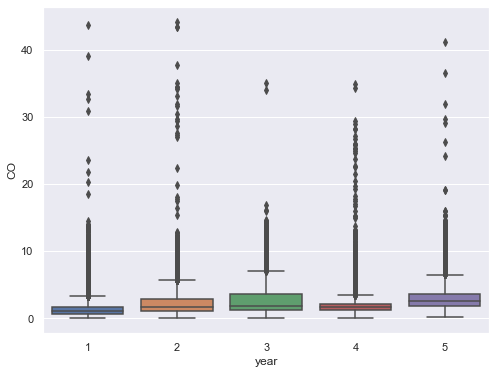

In [353]:
# box plot of categorical features vs. target

fig = plt.figure(figsize=(8,6))
sns.set(style="darkgrid")

year_labels = [1,2,3,4,5]
sns.boxplot(x='year', y='CO', data=gas_df, order=year_labels)
plt.show()

**Question 4**:  The box plot of year vs. CO emission is shown above. The CO emission seems to generally increase over the years, with 2011 having much lower emissions than 2015. However, 2014 emission breaks this trend, as it also has low emissions comparable to 2011 levels. All years have many large outliers above the maximum value, which could hurt performance.

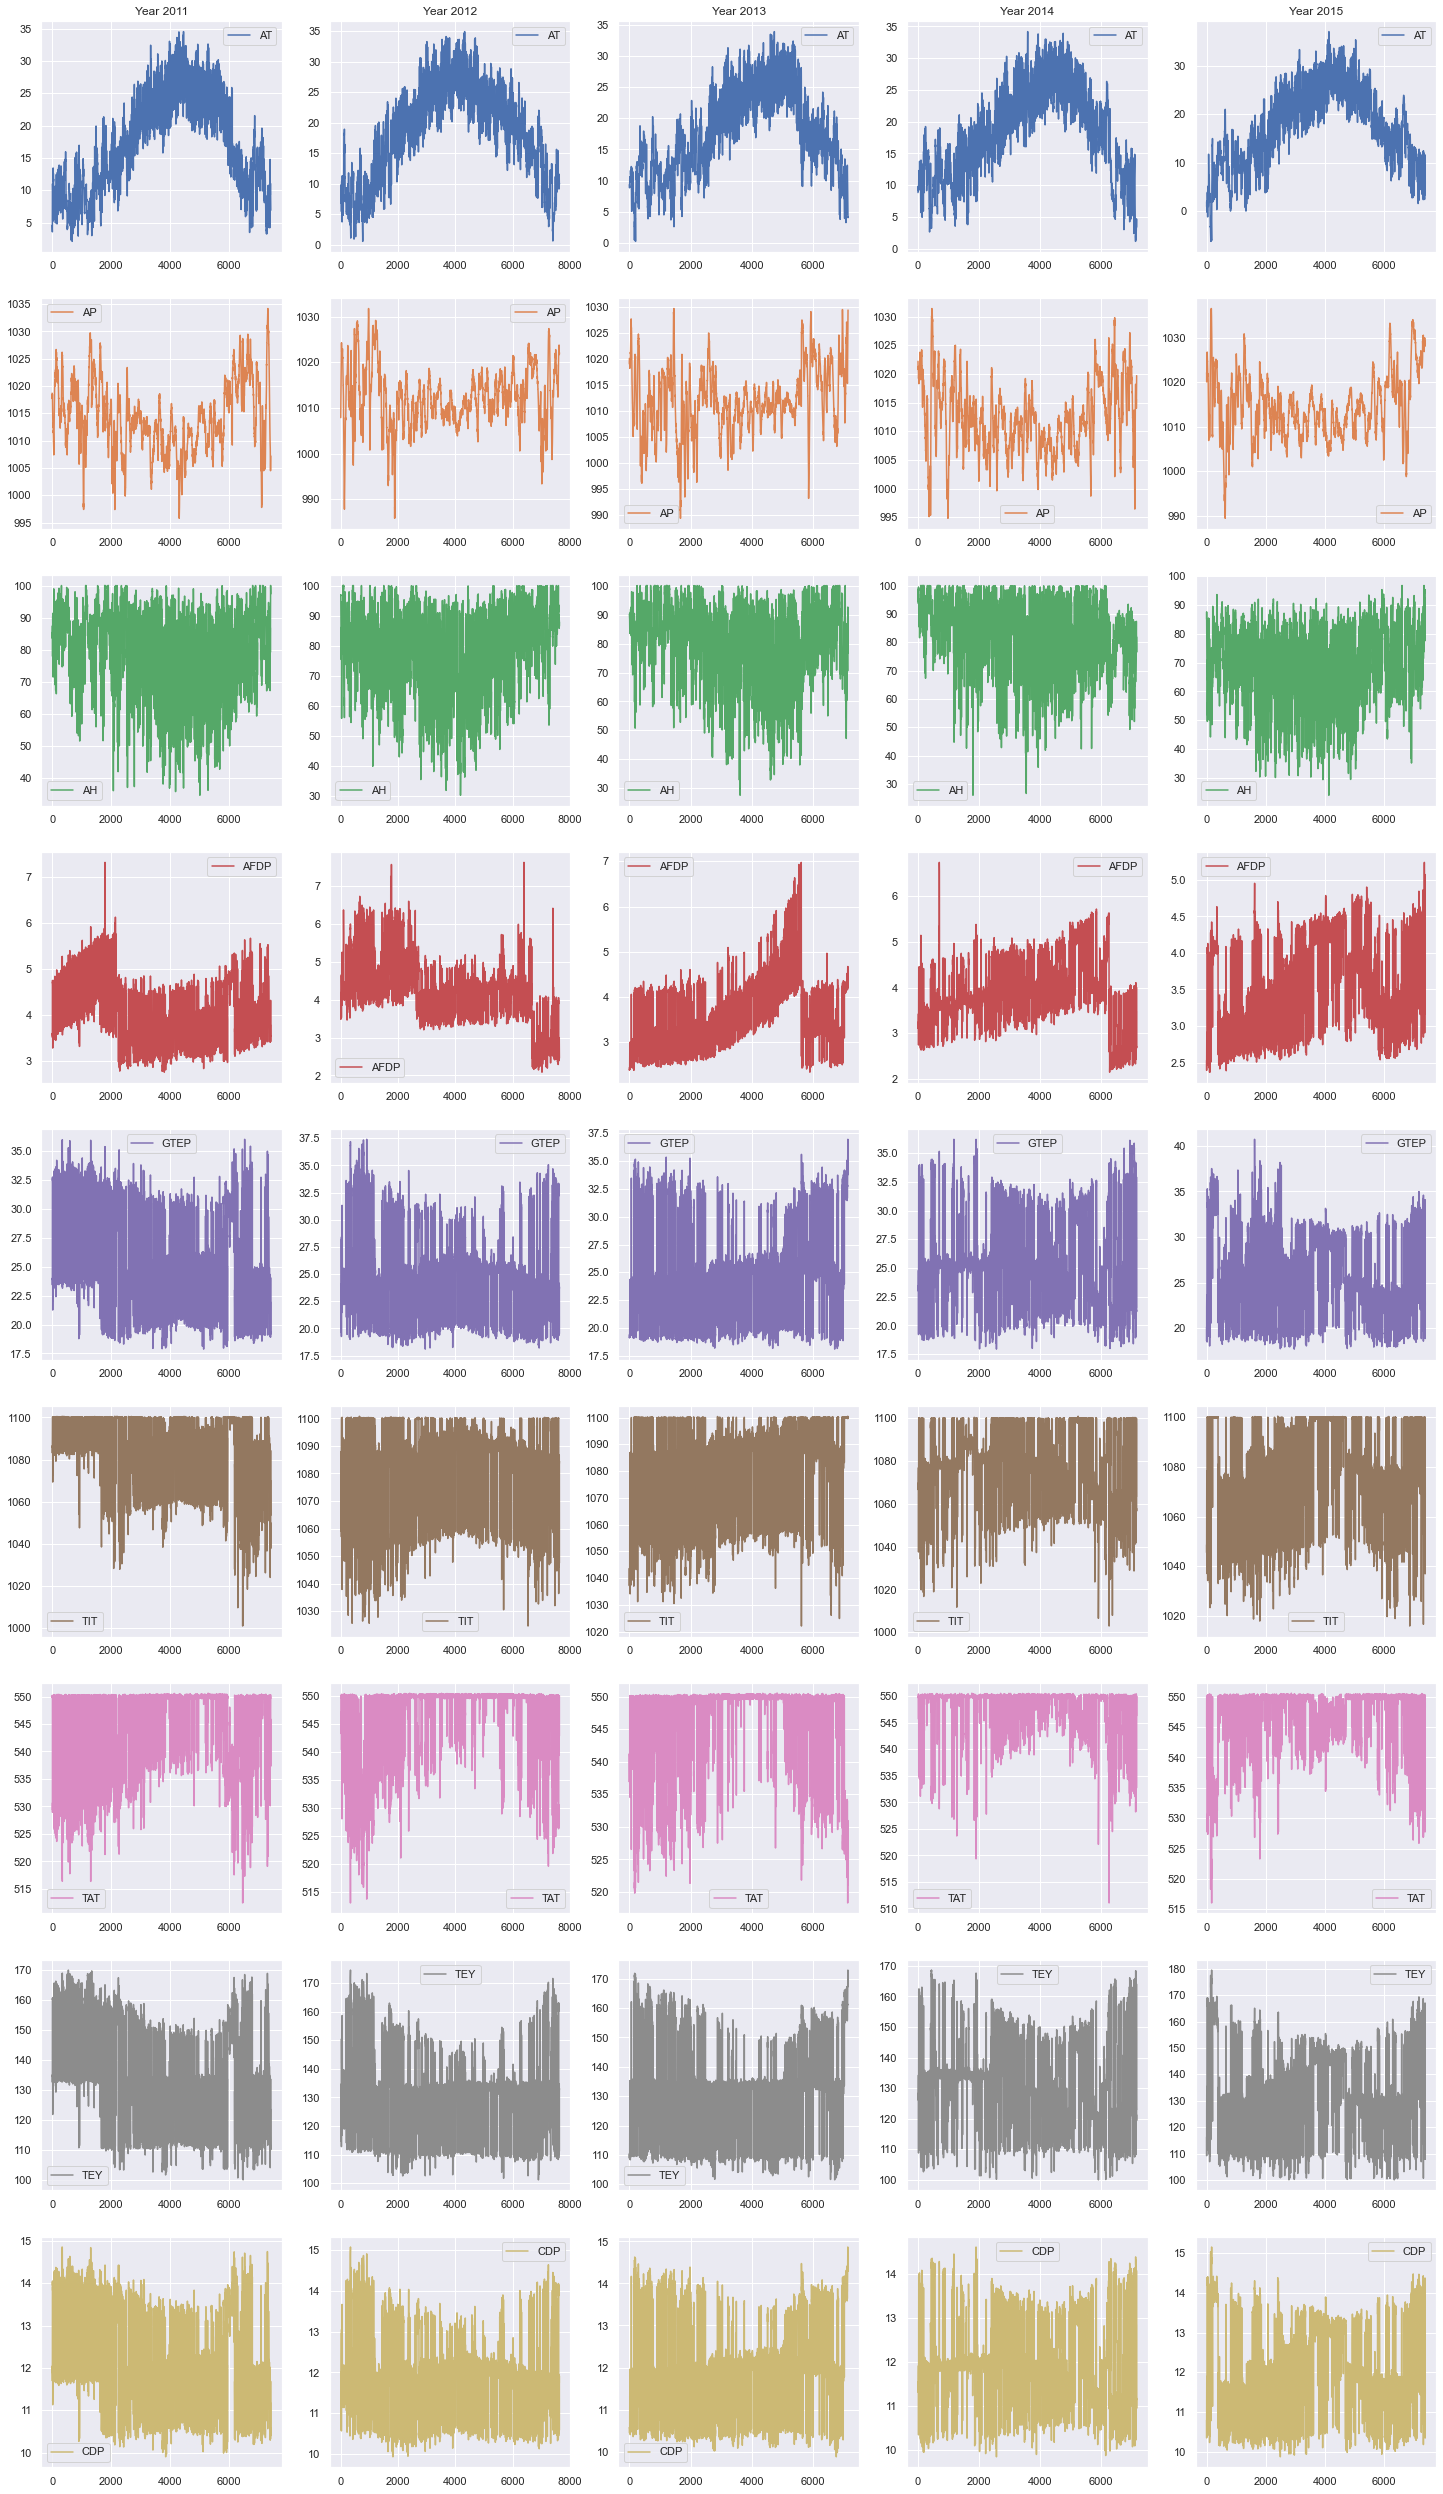

In [400]:
# yearly trends for each feature

fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(25,45))

for i in [1,2,3,4,5]:
    year_df = gas_df[gas_df['year']==i].drop(columns=['CO','year'], axis=1)
    year_df.plot(subplots=True, ax=axes[:,i-1])
    axes[0,i-1].set_title('Year 201{}'.format(i))

plt.show()

**Question 6**: The yearly trends for each feature are plotted above. The features generally show similar trends througout each year. For instance, AT increases to its maximum value during the middle of the year then decreases, and AFDP increases for a short time then drops to a lower value and increases again. The plots also show changes over the years. For example, AT appears to decreases slightly from 2011 to 2015. Overall, the noisiness of many features such as TIT and CDP make trends difficult to deduce.

### Feature Selection

In [401]:
# mutual information regression

mi = mutual_info_regression(X_proc, y)
mi /= np.max(mi)
mi_features = X_proc.columns[np.argsort(mi)[::-1]]
print("Features in decreasing mutual information with target: {}".format(mi_features.tolist()))
print("Decreasing mutual information: {}".format(np.sort(mi)[::-1]))

Features in decreasing mutual information with target: ['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP', 'TAT', 'year', 'AT', 'AP', 'AH']
Decreasing mutual information: [1.         0.92166337 0.88198479 0.82846533 0.51835261 0.29840111
 0.22950959 0.19506366 0.07692084 0.04750697]


In [402]:
# f regression

f_test, _ = f_regression(X_proc, y)
f_test /= np.max(f_test)
f_features = X_proc.columns[np.argsort(f_test)[::-1]]
print("Features in decreasing F score with target: {}".format(f_features.tolist()))
print("Decreasing F score: {}".format(np.sort(f_test)[::-1]))

Features in decreasing F score with target: ['TIT', 'TEY', 'CDP', 'GTEP', 'AFDP', 'year', 'AT', 'AH', 'AP', 'TAT']
Decreasing F score: [1.         0.48305953 0.43807416 0.37022582 0.25288336 0.03304671
 0.03148967 0.01154528 0.00453729 0.00343286]


In [10]:
X_proc = X_proc.drop(columns=['year', 'AT', 'AH', 'AP', 'TAT'], errors='ignore')
X_features = X_proc.columns
print(X_features)

X_proc = X_proc.to_numpy()
print(X_proc.shape)

Index(['AFDP', 'GTEP', 'TIT', 'TEY', 'CDP'], dtype='object')
(36733, 5)


In [11]:
# scale target

y = StandardScaler().fit_transform(y.values.reshape(-1,1)).reshape((-1))

**Question 7**: Based on the mutual information and F score of each feature with the target variable, the features 'year', 'AT', 'AH', 'AP', and 'TAT' were dropped from the data. These features have significantly lower mutual information and F score with the target, suggesting that there is low statistical dependency between price and each of these features. Dropping these features may lower the performance of regression models because some information is discarded, but training and testing will require less computation.

### Training

#### Linear Regression

In [407]:
# linear regression

print('Ordinary least squares:')
rmse_train, rmse_test = cv_rmse(LinearRegression(), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

print()

# lasso regression

print('Lasso:')
rmse_train, rmse_test = cv_rmse(Lasso(alpha=0.01), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

print()

# ridge regression

print('Ridge:')
rmse_train, rmse_test = cv_rmse(Ridge(alpha=0.01), X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))


Ordinary least squares:
Average training RMSE: 0.6679448529454656
Average validation RMSE: 0.6966376895573444

Lasso:
Average training RMSE: 0.6743798490897392
Average validation RMSE: 0.6865917304267717

Ridge:
Average training RMSE: 0.6679448529610783
Average validation RMSE: 0.6966358872494798


In [409]:
with ignore_warnings(category=(ConvergenceWarning)):
    lasso_params = {'alpha': np.logspace(-9,0,10)}
    gs = GridSearchCV(Lasso(), lasso_params, cv=10, scoring='neg_root_mean_squared_error')
    gs.fit(X_proc, y)

    print('Optimal lasso regularization: {}'.format(gs.best_estimator_))
    print('Best RMSE: {}'.format(-gs.best_score_))

Optimal lasso regularization: Lasso(alpha=0.01)
Best RMSE: 0.6865917304267717


In [410]:
ridge_params = {'alpha': np.logspace(-9,0,10)}
gs = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal ridge regularization: {}'.format(gs.best_estimator_))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal ridge regularization: Ridge()
Best RMSE: 0.69645927399487


In [412]:
gs.best_estimator_.get_params()['alpha']

1.0

**Question 9**: Based on the gridsearch with 10-fold cross validation above, lasso regularization with alpha=0.01 achieves the lowest cross validation RSME of 0.6866.

#### Polynomial Regression

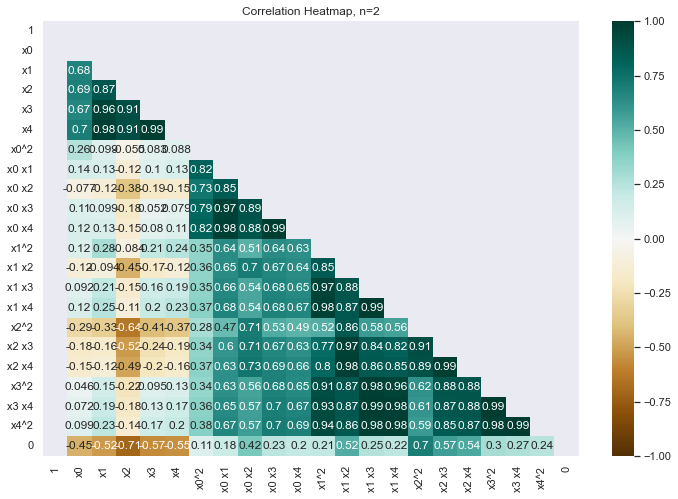

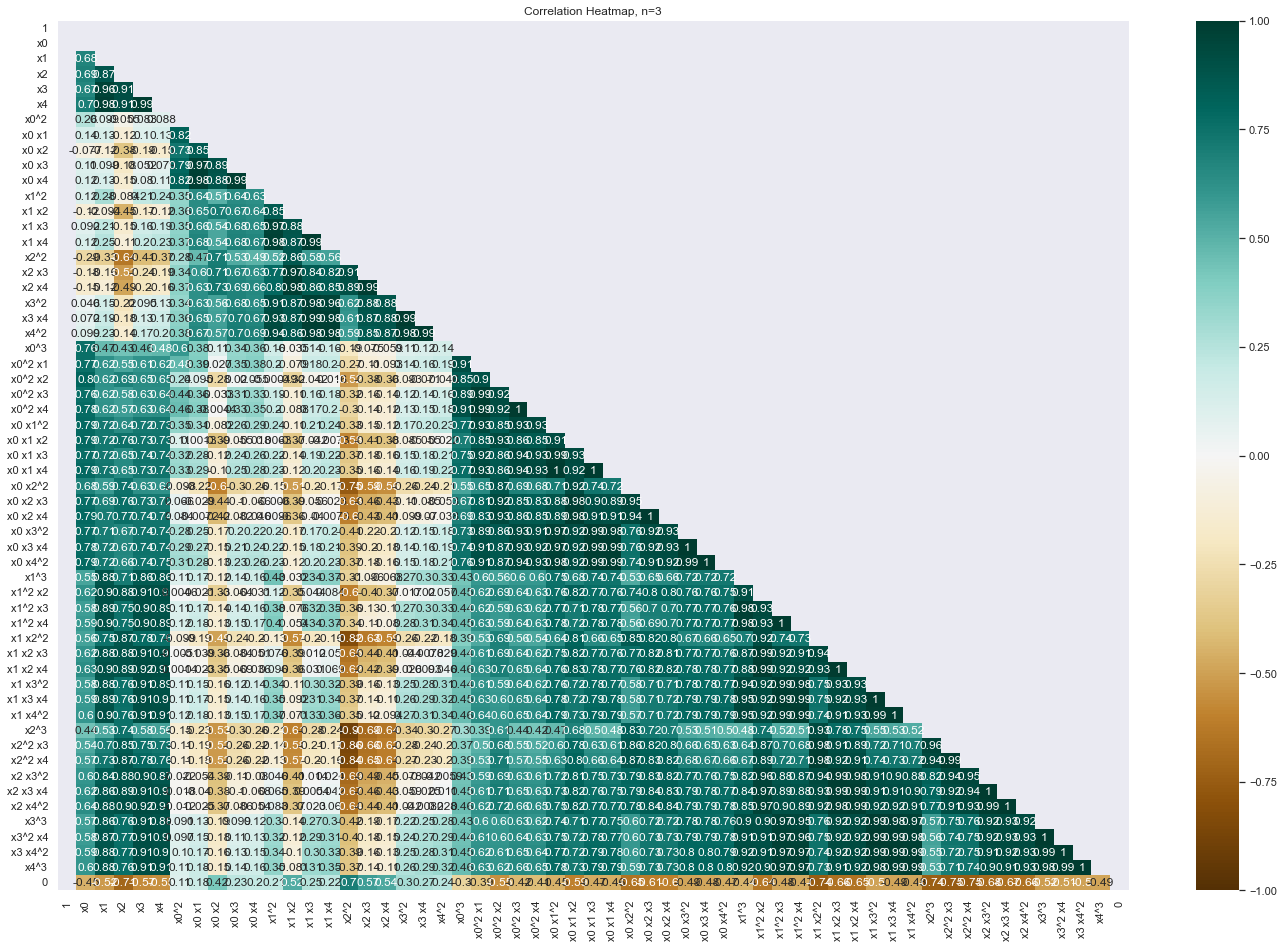

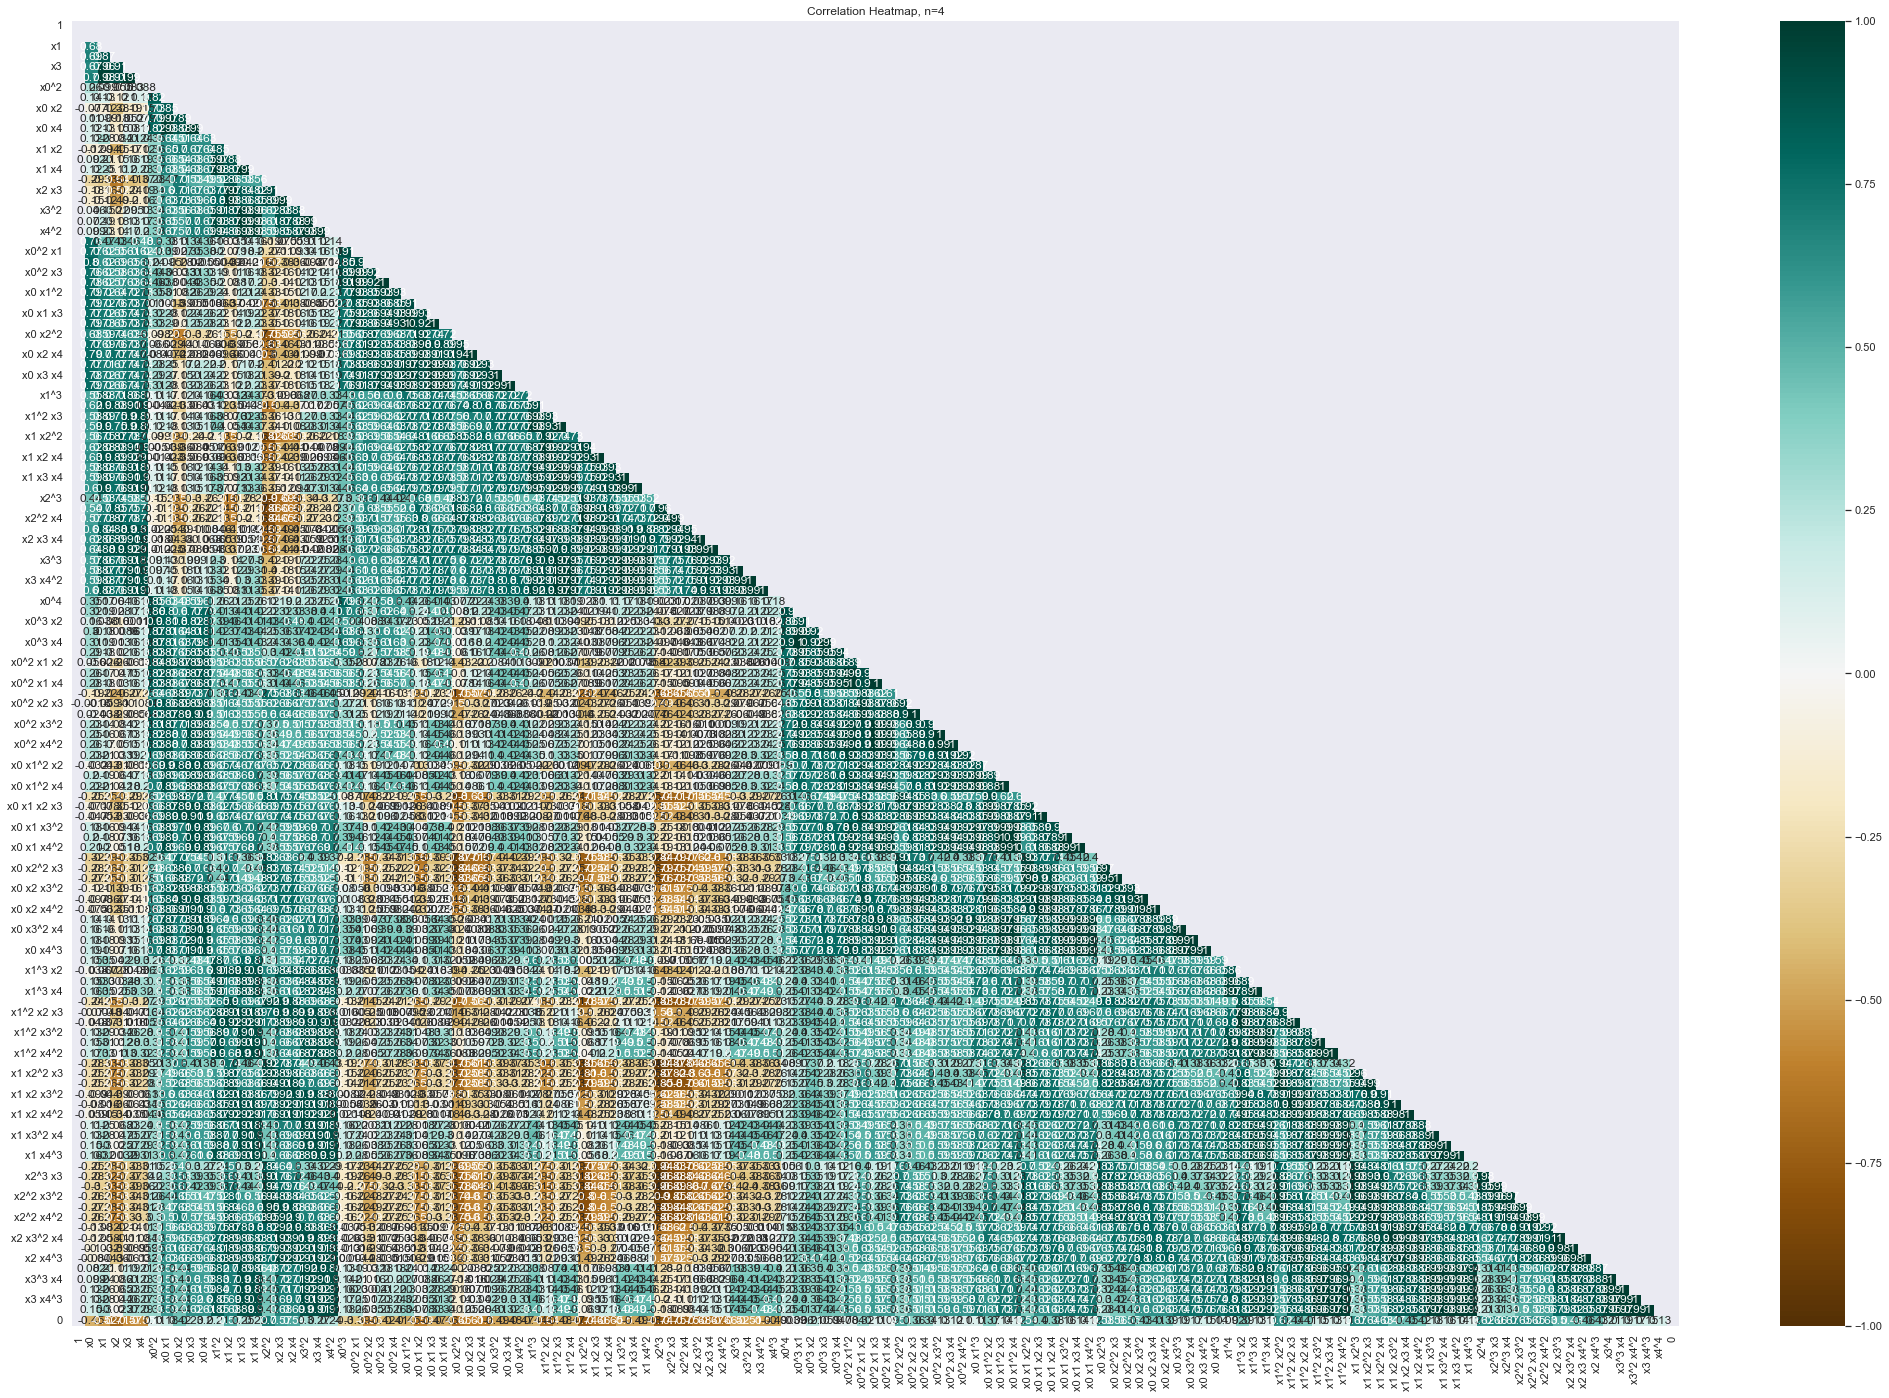

In [415]:
# polynomial features correlation map

for n in np.arange(2,5):

    poly = PolynomialFeatures(n)
    X_poly = poly.fit_transform(X_proc)

    # heatmap of polynomial feature correlation with target variable

    X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out())
    diamond_full = X_poly_df.join(pd.DataFrame(y), how='right')
    corr_mat = diamond_full.corr()

    plt.figure(figsize=(12*(n-1),8*(n-1)))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    heatmap = sns.heatmap(corr_mat, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title("Correlation Heatmap, n={}".format(n))
    plt.show()

**Question 12**: The most salient features appear to be x2, x2^2, x1x2^2, x1x2^2, x2^3,x2^2x3, x2^2x4, which are the features that have absolute correlation with the target around 0.7 or higher (where x0, x1, ..., x4 are the features AFDP, GTEP, TIT, TEY, CDP, respectively). x2 appears in all of these most salient features, suggesting that the feature TIT, and its higher-order interactions, is a strong predictor of CO emissions.

In [416]:
# polynomial regression

with ignore_warnings(category=(ConvergenceWarning,LinAlgWarning)):
    
    for n in np.arange(2,5):

        print("Degree: {}".format(n))

        poly = PolynomialFeatures(n)
        X_poly = poly.fit_transform(X_proc)

        # OLS

        print('Ordinary least squares:')
        rmse_train, rmse_test = cv_rmse(LinearRegression(), X_poly, y)

        print('Average training RMSE: {}'.format(rmse_train))
        print('Average validation RMSE: {}'.format(rmse_test))

        # lasso regression

        lasso_params = {'alpha': np.logspace(-9,0,10)}
        gs = GridSearchCV(Lasso(), lasso_params, cv=10, scoring='neg_root_mean_squared_error')
        gs.fit(X_poly, y)

        print('Optimal lasso regularization: {}'.format(gs.best_estimator_))
        print('Best RMSE: {}'.format(-gs.best_score_))

        # ridge regression

        ridge_params = {'alpha': np.logspace(-9,0,10)}
        gs = GridSearchCV(Ridge(), ridge_params, cv=10, scoring='neg_root_mean_squared_error')
        gs.fit(X_poly, y)

        print('Optimal ridge regularization: {}'.format(gs.best_estimator_))
        print('Best RMSE: {}'.format(-gs.best_score_))

        print()

Degree: 2
Ordinary least squares:
Average training RMSE: 0.5963516474658002
Average validation RMSE: 0.6565171721811043
Optimal lasso regularization: Lasso(alpha=0.01)
Best RMSE: 0.6350384618853451
Optimal ridge regularization: Ridge()
Best RMSE: 0.6524783335730214

Degree: 3
Ordinary least squares:
Average training RMSE: 0.5738078551599599
Average validation RMSE: 0.7565452064888731
Optimal lasso regularization: Lasso(alpha=0.01)
Best RMSE: 0.6436784637418074
Optimal ridge regularization: Ridge()
Best RMSE: 0.6876532082534261

Degree: 4
Ordinary least squares:
Average training RMSE: 0.5442251680381222
Average validation RMSE: 1.3667222534900931
Optimal lasso regularization: Lasso(alpha=0.01)
Best RMSE: 0.6520795950619924
Optimal ridge regularization: Ridge()
Best RMSE: 0.7230390668343942



**Question 13**: The best degree was found to be 2, using lasso regression with alpha=0.01, which achieved a validation RMSE of 0.6350.

#### Neural Network

In [420]:
# neural network

reg = MLPRegressor(hidden_layer_sizes=(100,), alpha=1e-4, max_iter=200)
rmse_train, rmse_test = cv_rmse(reg, X_proc, y)

print('Average training RMSE: {}'.format(rmse_train))
print('Average validation RMSE: {}'.format(rmse_test))

C:\Users\gtang\anaconda3\envs\ee219\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gtang\anaconda3\envs\ee219\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gtang\anaconda3\envs\ee219\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gtang\anaconda3\envs\ee219\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Average training RMSE: 0.5376168356682357
Average validation RMSE: 0.6794098801686659


C:\Users\gtang\anaconda3\envs\ee219\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
# tune network size and weight decay

parameters = {'hidden_layer_sizes': [(20,), (50,), (100,), (20,20), (50,50), (100,100), (20,20,20), (50,50,50), (20,50,100)], 'alpha': np.logspace(-5,-1,5)}
gs = GridSearchCV(MLPRegressor(max_iter=200), parameters, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal MLP: {}'.format(gs.best_estimator_))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal MLP: MLPRegressor(alpha=0.1, hidden_layer_sizes=(50,))
Best RMSE: 0.6572402652648828


**Question 16**: The optimal MLP is one with one layer with 50 units and alpha=0.1. It achieves an RMSE of 0.6572.

#### Random Forest

In [13]:
# tune hyperparameters

parameters = {'n_estimators': [25,50,75,100,150,200], 'max_features': [1,2,3,4], 'max_depth': np.linspace(1,10,10,dtype=int)}

gs = GridSearchCV(RandomForestRegressor(), parameters, cv=10, scoring='neg_root_mean_squared_error')
gs.fit(X_proc, y)

print('Optimal random forest: {}'.format(gs.best_estimator_))
print('Best RMSE: {}'.format(-gs.best_score_))

Optimal random forest: RandomForestRegressor(max_depth=9, max_features=1)
Best RMSE: 0.6233110394200021


In [14]:
gs.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 9,
 'max_features': 1,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Question 19**: The hyperparameters have been tuned above, and the optimal random forest model has max_features=1, n_estimators=100, and max_depth=9.

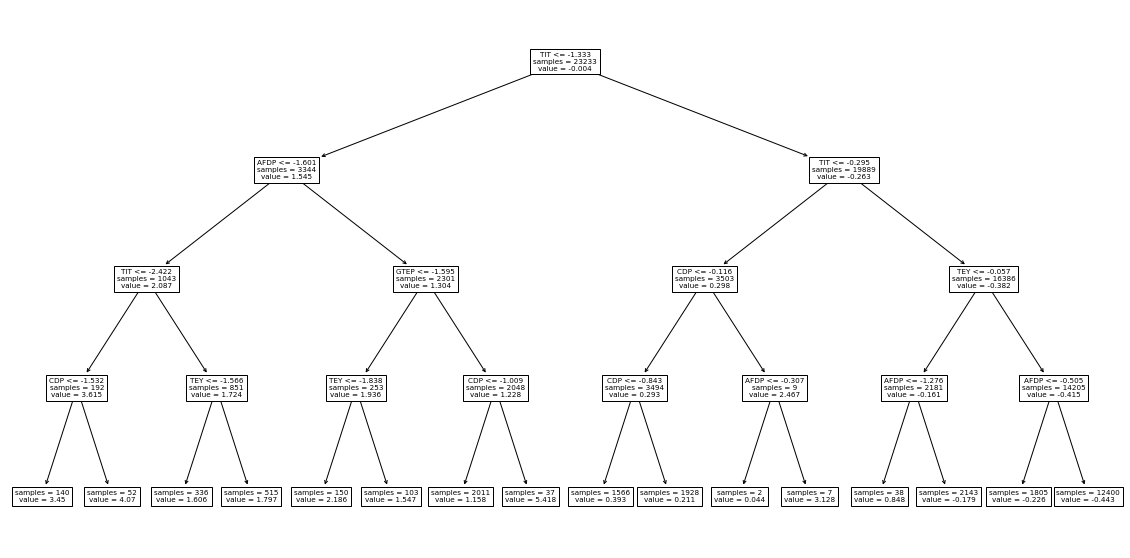

In [15]:
# rf with max_depth=4

reg = RandomForestRegressor(max_depth=4, max_features=1).fit(X_proc, y)

plt.figure(figsize=(20,10))
plot_tree(reg.estimators_[0], feature_names=X_features, impurity=False)
plt.show()

**Question 21**: A tree with max_depth of 4 is shown above. The feature selected for branching at the root node is TIT, which was also the feature with the highest mutual information score and F score. This feature is likely the most discriminating for predicting the target from the full training dataset, as splitting based on this feature first leads to the greatest gain.

C:\Users\gtang\anaconda3\envs\ee219\lib\site-packages\sklearn\ensemble\_forest.py:550: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


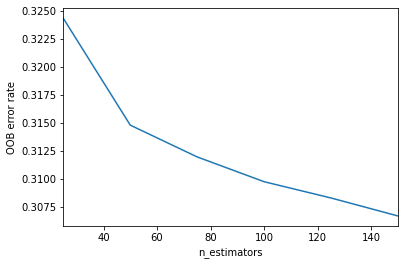

In [23]:
# out of bag error

oob_error_list = []
min_estimators, max_estimators = 25, 150
n_estimators_list = np.linspace(min_estimators, max_estimators, 6, dtype=int)

reg =  RandomForestRegressor(warm_start=True, oob_score=True, n_estimators=100, max_features=1, max_depth=9)

for i in n_estimators_list:
    reg.set_params(n_estimators=i)
    reg.fit(X_proc, y)

    oob_error = 1 - reg.oob_score_
    oob_error_list.append(oob_error)

plt.plot(n_estimators_list, oob_error_list)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

**Question 26**: The OOB error is shown above.

## Evaluation

**Question 25**: 10-fold cross validation has been computed in every case above. Training and validation RMSE are different in all the above tests because the datasets do not contain exactly the same samples. Each model is optimized for the training data, but it is not necessarily optimized for the validation set as well. Some models above were found to overfit to the training data, given that their training RMSE was significantly lower than their validation data. With proper regularization though, overfitting could be avoided, in which case the models' training and validation RMSEs should be similar.

**Question 26**: Each tree in a random forest is trained on a bootstrap sample of the training data, so each training sample has not been seen by every tree. The OOB error gives the average error for each training sample when predicting the target of the sample using only the trees that have not been trained on the particular sample. This gives a sense of validation error, because the OOB error considers only the trees for which each sample is a new observation.

R^2 is a measure of how well the model accounts for the variation in the data, and it is typically computed by running the trained model on unseen validation data. The OOB score can be used as an estimate for R^2 during training, as it has the same mathematical formulation as R^2. Both scores evalute how well a model generalizes to new data. sklearn provides an OOB score, from which OOB error can be calculated 1-OOB score.

However, OOB error is not a complete measure of the model's validation performance, as it evaluates on a subset of the trees rather than aggregating all the trees in the forest. OOB error can be useful when there is a dataset is limited and it is desired for all the data to be used for training.